In [4]:

%load_ext autoreload

%autoreload 2

from RNN2DFA.LSTM import LSTMNetwork
# from GRU import GRUNetwork
from RNN2DFA.RNNClassifier import RNNClassifier
from RNN2DFA.Training_Functions import mixed_curriculum_train,make_train_set_for_target
from Tomita_Grammars import tomita_1, tomita_2, tomita_3, tomita_4, tomita_5, tomita_6, tomita_7, tomita_8, tomita_9, tomita_10
from lstar_extraction.Training_Functions import make_test_set
from RNNexplainer import Explainer
from PACTeacher.pac_teacher import PACTeacher as Teacher 







In [5]:
# make training set
target = tomita_4
alphabet = "ab"

# alphabet = "abcd"
train_set = make_train_set_for_target(target,alphabet)

# define rnn
rnn = RNNClassifier(alphabet,num_layers=1,hidden_dim=10,RNNClass = LSTMNetwork)


print(train_set)


: False, 'aaabbabaabb': False, 'ababbabaabb': False, 'abaabbbbaaa': False, 'aabbaaabbbb': False, 'abaababbbaa': False, 'abbbbaababa': False, 'abbabbbbaaa': False, 'aaababbbbaa': False, 'bbaabaabaaa': False, 'bbaaabbbabb': False, 'baabababbbb': False, 'aabbbbbabaa': False, 'abbbbbbbbaba': True, 'abbabbabbbbb': True, 'abababababba': True, 'abbbababbabb': True, 'ababbababbab': True, 'bbabbbbababa': True, 'abbbabbbbbbb': True, 'bbbabbbabbab': True, 'abbbbabbabab': True, 'bbabbbababba': True, 'bababbbbabba': True, 'abbbabbbbbab': True, 'babbbabbbbba': True, 'abbabbbbabba': True, 'bbababbababb': True, 'bbbabbbbbbab': True, 'babbabbbbabb': True, 'bababbbbabbb': True, 'babbabbababb': True, 'bbbbabbbabba': True, 'abbbbabababa': True, 'bbbabbabbaba': True, 'ababbbbabbab': True, 'ababbabbbbba': True, 'abbababbbbab': True, 'ababababbabb': True, 'bababbbbbbbb': True, 'bbbbbbbababa': True, 'abbbbbbbbabb': True, 'bababbbabbbb': True, 'bbababbababa': True, 'bbbbbbababba': True, 'babbbbbbbbba': True, '

current average loss is:  0.002449282477120621


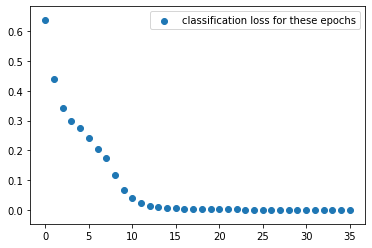

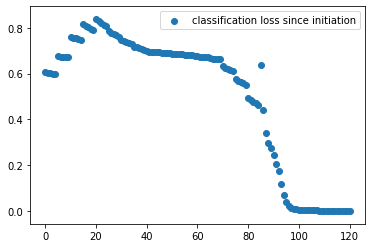

classification loss on last batch was: 0.0004752527190809833


In [6]:
# train the model
mixed_curriculum_train(rnn,train_set,stop_threshold = 0.0005)
rnn.renew()  


provided counterexamples are: None
obs table refinement took 0.0
guided starting equivalence query for DFA of size 1


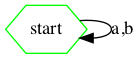

lstar successful: unrolling seems equivalent to proposed automaton
equivalence checking took: 0.011558000000000845
overall guided extraction time took: 0.01200099999999793
generated counterexamples were: (format: (counterexample, counterexample generation time))



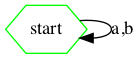

testing on train set, i.e. test set is train set
test set size: 1861
of which positive: 806 (43.31%)
rnn score against target on test set: 1861 (100.0%)
extracted dfa score against rnn on test set: 806 (43.31%)
extracted dfa score against target on rnn's test set: 806 (43.31%)


In [7]:
# starting examples
# all_words = sorted(list(train_set.keys()),key=lambda x:len(x))
# pos = next((w for w in all_words if rnn.classify_word(w)==True),None)
# neg = next((w for w in all_words if rnn.classify_word(w)==False),None)
# starting_examples = [w for w in [pos,neg] if not None == w]



# extract DFA from RNN
from RNN2DFA.Extraction import extract


dfa_from_rnn = extract(rnn,time_limit = 50,initial_split_depth = 10,starting_examples=None)


# some statistics
from math import pow
def percent(num,digits=2):
    tens = pow(10,digits)
    return str(int(100*num*tens)/tens)+"%"

dfa_from_rnn.draw_nicely(maximum=30) #max size willing to draw

test_set = train_set 
print("testing on train set, i.e. test set is train set")
# we're printing stats on the train set for now, but you can define other test sets by using
# make_train_set_for_target again

n = len(test_set)
print("test set size:", n)
pos = len([w for w in test_set if target(w)])
print("of which positive:",pos,"("+percent(pos/n)+")")
rnn_target = len([w for w in test_set if rnn.classify_word(w)==target(w)])
print("rnn score against target on test set:",rnn_target,"("+percent(rnn_target/n)+")")
dfa_rnn = len([w for w in test_set if rnn.classify_word(w)==dfa_from_rnn.classify_word(w)])
print("extracted dfa score against rnn on test set:",dfa_rnn,"("+percent(dfa_rnn/n)+")")
dfa_target = len([w for w in test_set if dfa_from_rnn.classify_word(w)==target(w)])
print("extracted dfa score against target on rnn's test set:",dfa_target,"("+percent(dfa_target/n)+")")



In [8]:
test_set=make_test_set(alphabet)

from RNNexplainer import Traces
traces=Traces(rnn, alphabet)
traces.label_from_network(test_set)
traces.write_in_file()


explainer=Explainer(alphabet=[character for character in alphabet])
teacher = Teacher(dfa_from_rnn)
teacher.teach(explainer,traces)

print("final ltl: ", explainer.ltl)


made test set of size: 165


NameError: name 'Traces' is not defined